<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Задача-1" data-toc-modified-id="Задача-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Задача 1</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="Задача-4-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Задача 4</a></span></li><li><span><a href="#Задача-5" data-toc-modified-id="Задача-5-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Задача 5</a></span></li><li><span><a href="#Задача-6" data-toc-modified-id="Задача-6-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Задача 6</a></span></li><li><span><a href="#Задача-7" data-toc-modified-id="Задача-7-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Задача 7</a></span></li><li><span><a href="#Задача-8" data-toc-modified-id="Задача-8-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Задача 8</a></span></li><li><span><a href="#Задача-9" data-toc-modified-id="Задача-9-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Задача 9</a></span></li><li><span><a href="#Задача-10" data-toc-modified-id="Задача-10-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Задача 10</a></span></li><li><span><a href="#Задача-11" data-toc-modified-id="Задача-11-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Задача 11</a></span></li><li><span><a href="#Задача-12" data-toc-modified-id="Задача-12-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Задача 12</a></span></li><li><span><a href="#Задача-13" data-toc-modified-id="Задача-13-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Задача 13</a></span></li><li><span><a href="#Задача-14" data-toc-modified-id="Задача-14-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Задача 14</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Приоритизация гипотез

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Для приоритезации гипотез воспользуемся фреймворками ICE и RICE. Изучим, как изменится приоритезация в используемых фреймвоках.

Для начала подготовим нашу таблицу к работе.

In [1]:
# Для начала подгрузим необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
# Подгрузим файл и сохраним его в переменной data_hyp
data_hyp = pd.read_csv('/datasets/hypothesis.csv')

#Увеличим ширину строк, что бы изучить все предлагаемые нам гипотезы
pd.set_option('max_colwidth', 120) 

#Вывеедм на экран наш файл
data_hyp.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#Изучим данные о типе данных, чтобы все расчеты были проведены верно
data_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#Для удобства приведем название столбцов к нижнему регистру
data_hyp.columns = data_hyp.columns.str.lower()
data_hyp.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Для начала приоритезируем гипотезы с помощью фреймворка ICE. Для этого расчитаем показатель ICE для каждой гипотезы и добавим в таблицу. После чего выведем на экран гипотезу и показатель ICE. Для наглядности отсортируем данные по убыванию.

In [5]:
data_hyp['ICE'] = (data_hyp['impact'] * data_hyp['confidence']) / data_hyp['efforts']
data_hyp[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Приоритет отдался гипотезе "Запустить акцию, дающую скидку на товарь в день рождения". 

Теперь воспользуемся фреймворком RICE.

In [6]:
data_hyp['RICE'] = (data_hyp['reach'] * data_hyp['impact'] * data_hyp['confidence']) / data_hyp['efforts']
(
    data_hyp[['hypothesis', 'RICE', 'ICE']]
    .sort_values(by='RICE', ascending=False)
    .style.background_gradient(subset=['RICE', 'ICE'], cmap='BuGn')
)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


Теперь приоритет отдался гипотезе "Добавить форму подпивки на все страницы, что бы собрать базу клиентов для email-рассылок".

При использовании разных фреймворком, мы получили разные приоритезации гипотез. Это связано с показателем "Reach", который сильно влияет на приоритезацию гипотез. С помощью данного показателя мы можем оценить на какое количество пользователей повлияет наша гипотеза.

## Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`. Сохраним результаты в соответствующих переменных, после чего изучим данные и при необходимости обработаем.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим есть ли в таблице `orders`, пользователи, которые одновременно попали в обе группы тестирования. 

In [13]:
# создадим датафреймы в разбивке по группам со столбцами visitoId и group
ordersA = orders.query('group == "A"')[['visitorId','group']]
ordersB = orders.query('group == "B"')[['visitorId','group']]

# теперь соединим полученные датафреймы по столбцу userId, соединение произойдет только тех значений, 
# которые есть сразу в обоих таблицах
orders_non_unique = ordersA.merge(ordersB, left_on='visitorId', right_on='visitorId')

# снесем дубликаты, чтобы оставить только уникальные значения
orders_non_unique = orders_non_unique.drop_duplicates()

# посмотрим на количество повторяющихся пользователей
display(orders_non_unique.shape[0])
orders_non_unique.head()

58

,visitorId,group_x,group_y
0,4069496402,A,B
1,199603092,A,B
5,3803269165,A,B
9,2378935119,A,B
29,237748145,A,B


Как видно из полученной таблицы, у нас есть пользователи, которые попали в обе группы одновременно. Это говорит об ошибке в сборе данных. Мы можем удалить этих пользователей из датафрейма `orders`, но не сможем удалить из датафрейма `visitors`, ввиду того что данные там агрегированы за день. Удаление этих пользователей только из одного датафрейма, скажется на показателе конверсии. Следовательно данных пользователей лучше не удалять.

### Задача 1

Построим график кумулятивной выручки по группам. Для этого соберём агрегированные кумулятивные по дням данные о заказах.

In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем соответствующие названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования: 

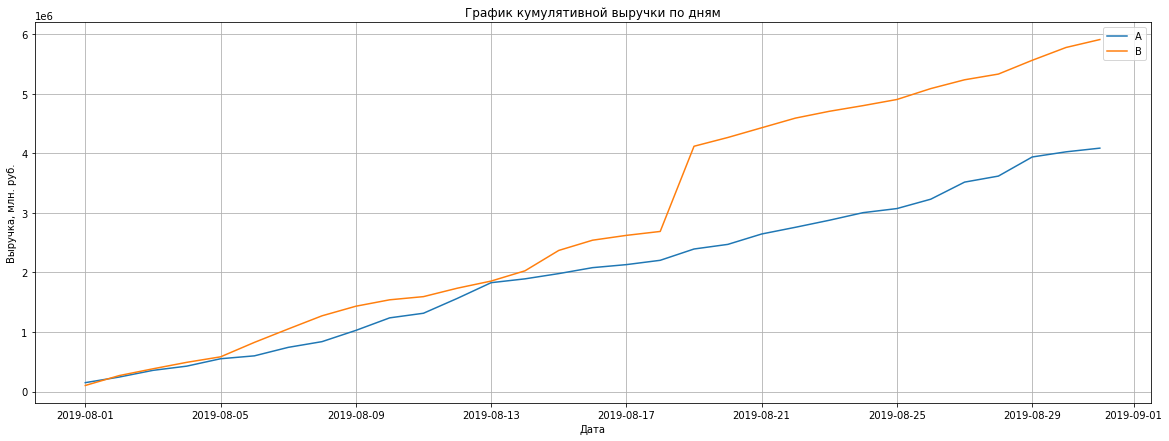

In [15]:
# датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в разбивке по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# зададим размеры графика
plt.figure(figsize=(20,7))

# Строим график выручки по групам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Приведем график в порядок
plt.title('График кумулятивной выручки по дням')
plt.ylabel('Выручка, млн. руб.')
plt.xlabel('Дата')
plt.legend()
plt.grid()

Выручка в группе А почти равномерно увеличивается в течение всего теста. У группы В наблюдается резкий рост выручки в один из дней. Это может быть как рост числа заказов, так и аномально дорогой заказ в этот день.

### Задача 2

Построим график кумулятивного среднего чека по группам. Для этого разделим кумулятивную выручку на кумулятивное количество заказов.

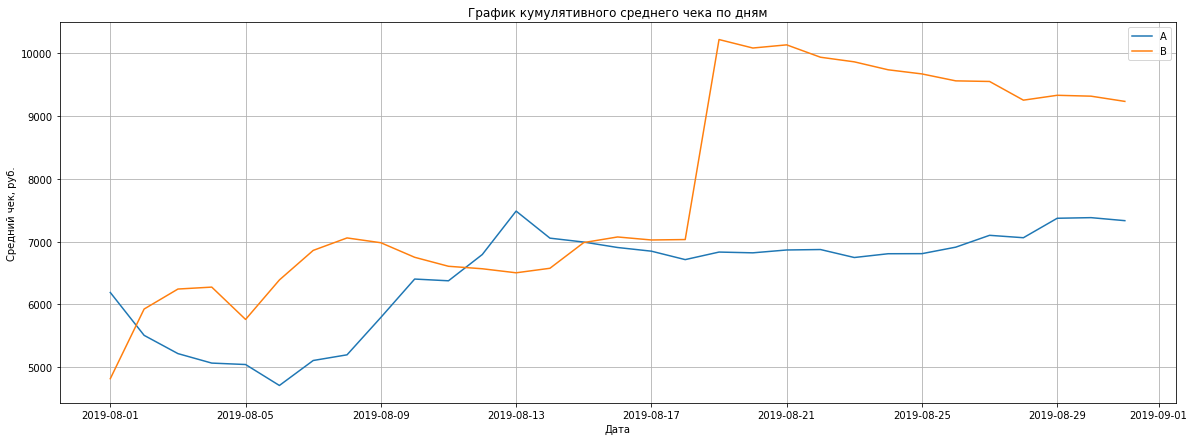

In [16]:
plt.figure(figsize=(20,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по дням')
plt.ylabel('Средний чек, руб.')
plt.xlabel('Дата')
plt.legend()
plt.grid()

Средний чек группы A стал более менее равномерным ближе к середиине теста, чего не скажешь о среднем чеке для группы B. На графике видно что в один из дней в грппе В был сделан крупный заказ, который сильно сместил данные о среднем чеке. Теперь чтобы нивелировать эту аномалию и выровняться, группе В необходимо больше данных.

### Задача 3

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Для этого соберем данные в одном датафрейме.

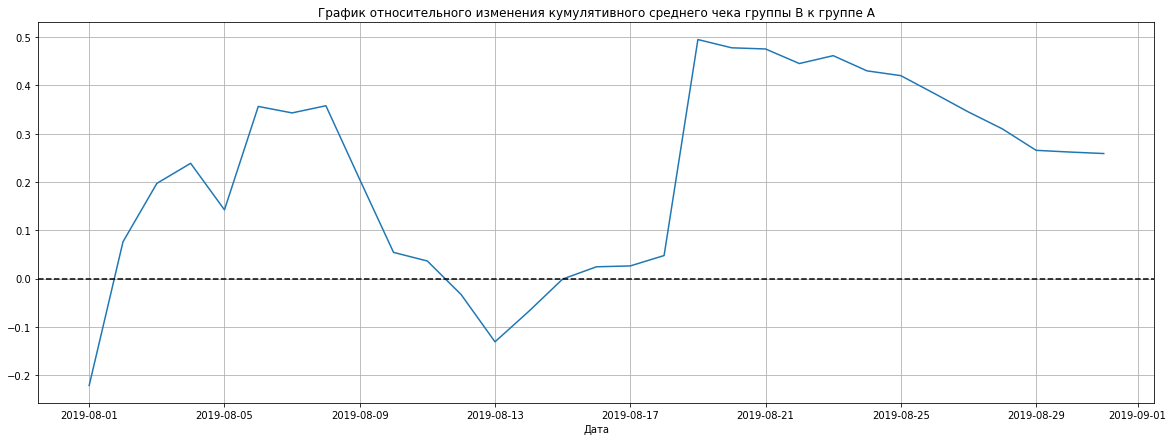

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (
    cumulativeRevenueA
    .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)
# задаем размер графика
plt.figure(figsize=(20,7))

# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.grid()

В нескольких точках график относительного изменения резко меняется, что говорит о наличие крупных заказов и выбросов. По большей части, такие скачки происходят в группе В.

### Задача 4

Построим график кумулятивного среднего количества заказов на посетителя по группам.

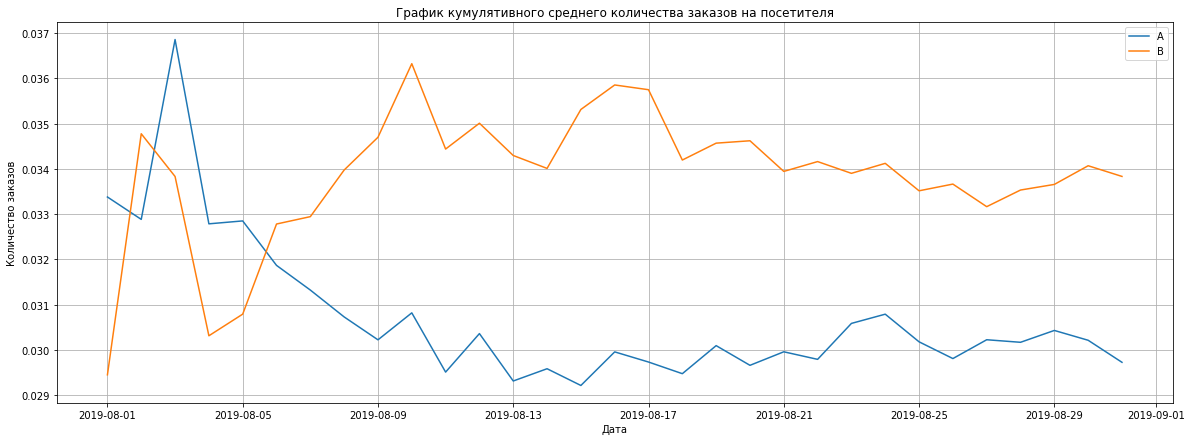

In [18]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группам
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# зададим размеры графика
plt.figure(figsize=(20,7))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.legend()
plt.grid()


Группы коллебались в начале теста. Ближе к концу теста среднее количество заказов становится равномерной в каждой группе. В среднее количество заказов B конверсия стабильно выше.

### Задача 5

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

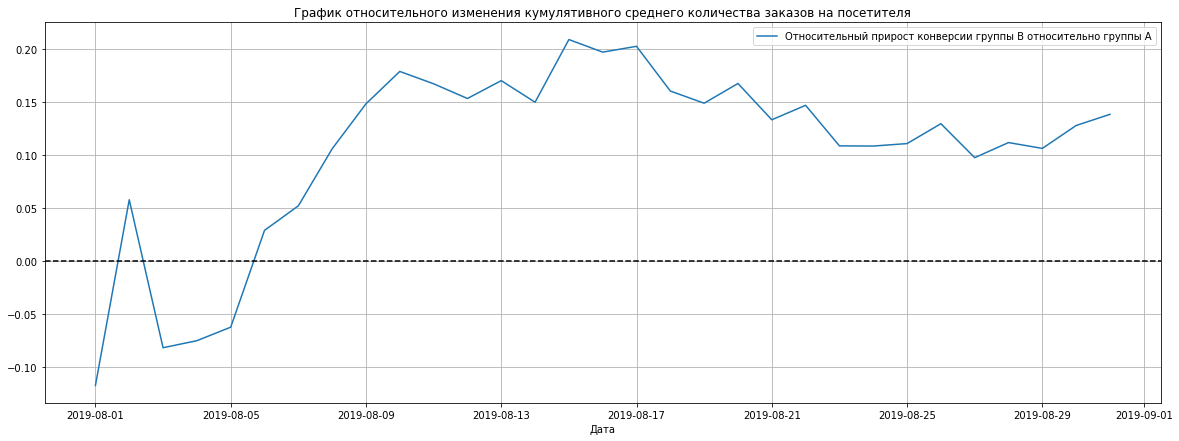

In [19]:
# Соберем данные в одном датафрейме
mergedCumulativeConversions = (
    cumulativeDataA[['date','conversion']]
    .merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
)

plt.figure(figsize=(20,7))

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.legend()
plt.grid()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. После чего ее конверсия постпенно падает, однако ближе к концу теста наблюдаются небольшие колебания между значениями 0.10-0.15. В целом отношение конверсии установилось, группа В отрабатывает лучше группы А, однако, сейчас делать какие-либо выводы по тесту нельзя. Для начала изучим данные на аномалии и взглянем, как они изменят ситуацию.

### Задача 6

Построим точечный график количества заказов по пользователям.

In [20]:
# Найдем количество заказов у каждого пользователя
ordersByVisitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitors.columns = ['visitorId', 'orders']

ordersByVisitors.sort_values(by='orders', ascending=False).head(5)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Некоторые пользователи совершили по 8, 9 и 11 заказов - больше, чем обычный покупатель. Посмотрим на график.

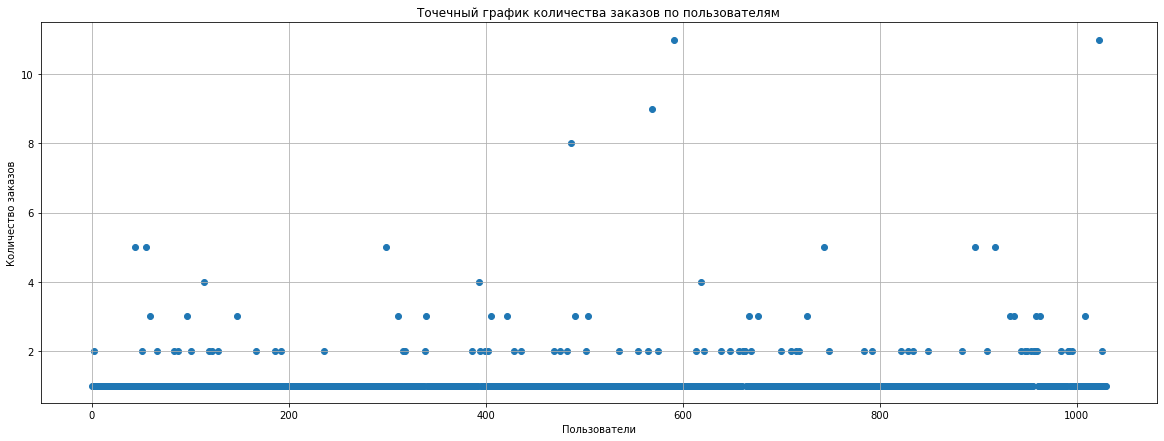

In [21]:
plt.figure(figsize=(20,7))
plt.scatter(range(0, len(ordersByVisitors['visitorId'])), ordersByVisitors['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.grid()

Большинство пользователей делали покупку только 1 раз. Но также видно, что есть доля пользователей с 2-3 покупками. Пока не ясно считать их аномалиями или нет. Для этого посчитаем выборочные перцентили количества заказов на одного пользователя

### Задача 7

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [22]:
np.percentile(ordersByVisitors['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. На мой взгляд, нет ничего аномального в 2 заказах. Аномальными пользователями будем считать тех, кто совершил 3 и более заказов.

### Задача 8

Построим точечный график стоимостей заказов.

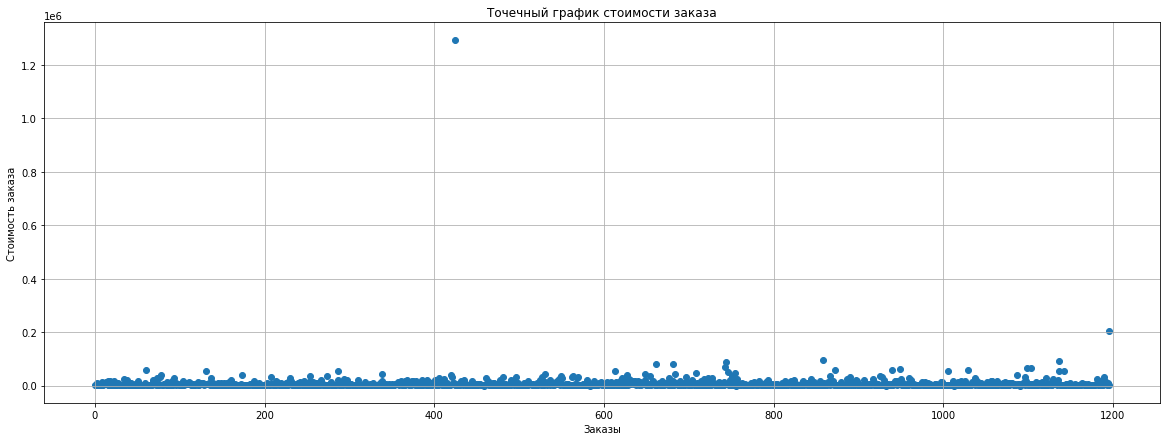

In [23]:
plt.figure(figsize=(20,7))
plt.scatter(range(0, len(orders['revenue'])), orders['revenue'])
plt.title('Точечный график стоимости заказа')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы')
plt.grid()

Есть небольшое количество дорогих заказов, и один аномально дорогой. Визуально сложно определить где ничинается граница дорогих заказов. Для понимания посчитае выборочные перцентили.

### Задача 9

Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [24]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95 процентов пользователей укладываются в сумму заказа до 28000 рублей. Возьмем сумму в 28000 рублей как границу для определения аномальных пользователей.

### Задача 10

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Подготовим данные.

In [25]:
# подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Пропишем названия столбцов:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Подготовим выборки к проверке критерием Манна-Уитни. Для этого объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [27]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

В `sampleA` сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке `sampleA` методом `mean()`. Аналогично найдём среднее группы B: `SampleB.mean()`.
Выведем относительный прирост среднего числа заказов группы B: `cреднее число заказов группы B / среднее число заказов группы A - 1`.  Округлим до трёх знаков после запятой.

In [28]:
display("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'0.017'

'0.138'

По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.017, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - мы отвергаем. Относительный проигрыш группы А равен 13.8%.

### Задача 11

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию `mannwhitneyu()` данные о выручке с заказов. Также найдём относительные различия в среднем чеке между группами:

In [29]:
display('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.729'

'0.259'

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A.

### Задача 12

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов по "очищенным" данным между группами нет. Альтернативная: различия в среднем между группами есть.

Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 1-5% пользователей с наибольшим числом заказов и пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

# Узнаем, сколько всего аномальных пользователей
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Итого у нас получилось всего 74 аномальных пользователей которые совершили более 2 покупок или купили на сумму превышающую 28000 рублей. Узнаем, как их действия повлияли на результаты теста. Подготовим выборки количества заказов по пользователям по группам теста:

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# Применим статистический критерий Манна-Уитни к полученным выборкам
display('Результаты "очищенных" данных:')
display('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display(
    'Относительный прирост среднего числа заказов группы B: {0:.3f}'
    .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
)
display('Результаты "сырых" данных:')
display('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
display(
    'Относительный прирост среднего числа заказов группы B: {0:.3f}'
    .format(sampleB.mean() / sampleA.mean() - 1)
)

'Результаты "очищенных" данных:'

'P-value: 0.013'

'Относительный прирост среднего числа заказов группы B: 0.173'

'Результаты "сырых" данных:'

'P-value: 0.017'

'Относительный прирост среднего числа заказов группы B: 0.138'

Результаты по среднему количеству заказов практически не изменились, следовательно аномальные пользователи никак на них не влияли. P-value = 0.013 < 0.05, следовательно, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет - мы отвергаем.

### Задача 13

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value незначительно уменьшился, но он все также больше 0,05, следовательно причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Сильно сократилась разница между сегментами По очищенным данным средний чек группы А на 2% выше среднего чека группы В, хотя по сырым данным разница между сегментами была 26% в пользу группы В.

### Задача 14

Примим решение по результатам теста.
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Есть статистически значимое различие по среднему количеству заказов между группами как по "сырым" данным, так по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и наблюдается тенденция к улучшению.
Несмотря на то, что средний чек сохранился на прежнем уровне, количество заказов в группе В выше на 13.8%, что повлечет за собой увеличение выручки.
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. 

## Вывод

В данном проекте перед нами стояла задача приоретизировать гипотезы и проанализировать результаты А/В теста.

Для приоритезации гипотез были использованы фреймворки ICE и RICE, которые в свою очередь, приоритезировали гипотезы по разному, ввиду наличия показателя Reach, который отвечает за охват пользователе и исользуется в фреймворке RICE.

Далее перед нами стояла задача проанализировать результаты А/В теста. Перед началом работы данные были подргужены и обработаны, для удобства работы с ними. В данных оказались пользователи, которые попали в обе группы одновременно. Это говорит об ошибке в сборе данных. Было принято решение не удалять данных пользователей, так как это повлечет за собой искажение информации, ввижу того что данные в датафрейме visitors агреггированы.

После чего мы приступили непосредственно к анализу результатов А/В теста:
1. Построили и изучили полученные результаты по графикам:
    - кумулятивной выручки по группам;
    - кумулятивного среднего чека по группам;
    - относительного изменения кумулятивного среднего чека группы B к группе A;
    - кумулятивного среднего количества заказов на посетителя по группам;
    - относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A;
2. Построили точечные графики количества заказов по пользователям и стоимостей заказов, чтобы выявить наличие аномалий
3. Посчитли 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов, что помогло нам выбрать границу для определения аномальных пользователей и заказов.
4. Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами и в среднем чеке заказа между группами по «сырым» данным.
5. После чего посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами и в среднем чеке заказа между группами по «очищенным» данным.

На основании полученных результатов тест следует остановить и признать успешным. При неизменном среднем чеке у обеих групп, в группе В среднее количество заказов на 13.8% выше, чем в группе А, что влечет за собой рост выручки.